<a href="https://colab.research.google.com/github/michaelbarkasi/Intro_Cog_Sci_Examples/blob/main/PNP_200_Single_Layer_Network_and_Perceptron_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sample Single-Layer Neural Network

CC Michael Barkasi 2024

[Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/) //
[BSD (3-Clause) License](https://opensource.org/licenses/BSD-3-Clause)

## Intro

What is this? Sample code and walkthrough of a single-layer neural network, based on the McCulloch-Pitts Neuron (1943). My Python is rusty, so I asked ChatGPT to write me some of the first chunks of Python code used below. I checked and cleaned them. The later chunks, with the activation functions and the perceptron convergence rule, were written by me.

Note: All code chunks must be run in order. Rerunning chunks in different orders might change results, because variables get be redefined with new input.

In [ ]:
# @title CoLab Reset
# Want to reset loaded code?
%reset -f

# Simulate Network Input

We'll be simulating the following network.

<div>
<img src="https://drive.google.com/uc?export=view&id=18CZ3uizrXD8l0l1FLo6MDBNLASKE36FF" alt="Schematic Figure of Neuron" width="500"/>
</div>

We start by simulating the activation values over time of the n input neurons.

Figure Credit: McCulloch-Pitts Neuron, Raquel Garrido Alhama, CC BY-SA 4.0, <https://creativecommons.org/licenses/by-sa/4.0>, via Wikimedia Commons



Simulating input neuron activation levels using random walks.


Number of input neurons to simulate: 5
Number of time steps to simulate: 100


Simulated mean total input: 0.5
Simulated input variation: 0.25




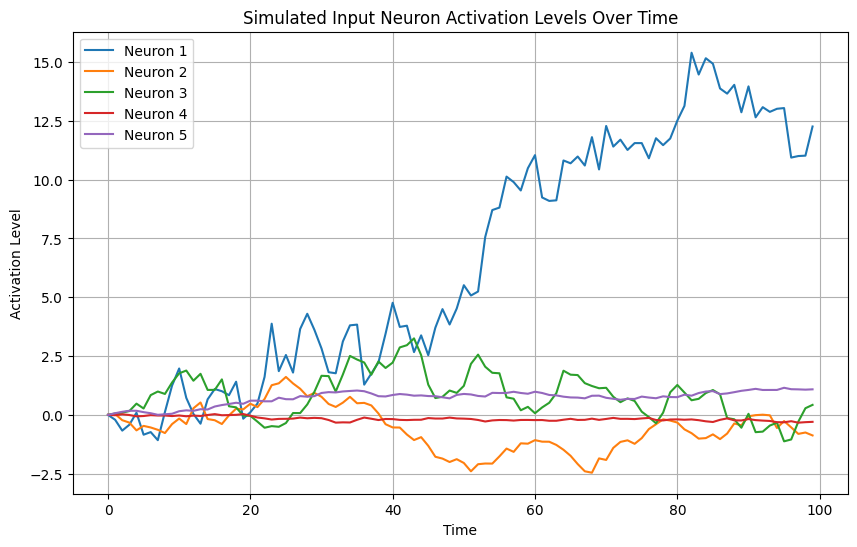

In [ ]:
# @title Generate Input Values

import numpy as np
import matplotlib.pyplot as plt

print("\n")
print(f"Simulating input neuron activation levels using random walks.")

# Number of input neurons to simulate
num_of_input_neurons = 5
time_steps = 100

print("\n")
print(f"Number of input neurons to simulate: {num_of_input_neurons}")
print(f"Number of time steps to simulate: {time_steps}")

# Create an array of zeros which will hold the input from our input units over the specified number of time steps
network_input = np.zeros((num_of_input_neurons, time_steps))

# Generate activation values (input) for each input neuron, using a random walk
mean_input = 0.5
input_variation = 0.25
activation_variation = np.abs(np.random.normal(mean_input,input_variation,size=num_of_input_neurons))

print("\n")
print(f"Simulated mean total input: {mean_input}")
print(f"Simulated input variation: {input_variation}")

for neuron in np.arange(num_of_input_neurons):
  for time_step in np.arange(time_steps)[1:]:
    network_input[neuron,time_step] = network_input[neuron,time_step-1] + np.random.normal(0,activation_variation[neuron])

# Plot the simulated input activation levels
print("\n")
plt.figure(figsize=(10, 6))
for neuron in range(num_of_input_neurons):
    plt.plot(network_input[neuron,:], label=f'Neuron {neuron + 1}')

plt.title("Simulated Input Neuron Activation Levels Over Time")
plt.xlabel("Time")
plt.ylabel("Activation Level")
plt.legend()
plt.grid(True)
plt.show()

# Simulate Cell Body Activation

Next, we simulate the cell body activation level from this simulated input using matrix multiplication (dot product).



Simulating cell body activation levels from the network inputs (linear sum of weighted inputs).


Randomly generated input weights for our 5 input neurons:
 [-0.03610259 -0.23557393  0.61220639 -0.69549691  0.6902635 ]




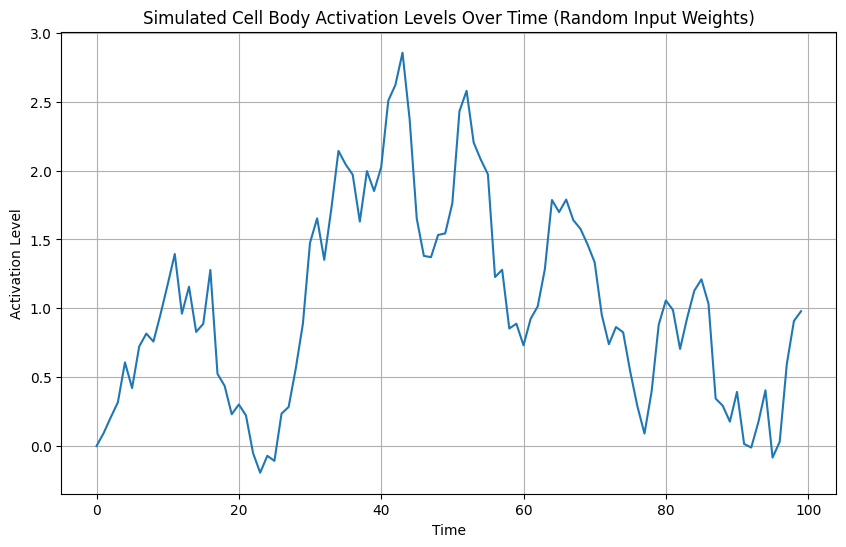

In [ ]:
# @title Compute Cell Body Activation with Dot Product

# Define a function to compute cell-body activation level from the input, as a simple linear combination of inputs and weights
def compute_cell_body_activation(network__weights, network__input):
    """
    Compute the cell body activation for each time step (column) of network_input.

    Parameters:
    - network__weights: 1-D NumPy array of shape (n,)
    - network__input: 2-D NumPy array of shape (n, m), storing the activation values of n input neurons over m time steps

    Returns:
    - cell__body__activation: 1-D NumPy array of shape (m,), storing the cell body activation level at each time step
    """

    # Check that inputs have the right shape for matrix multiplication
    if network__weights.shape[0] != network__input.shape[0]:
        raise ValueError("Number of weights must match the number of input neurons")

    # Compute the dot product for each column of network_input
    cell__body__activation = np.dot(network__weights, network__input)

    return cell__body__activation

print("\n")
print(f"Simulating cell body activation levels from the network inputs (linear sum of weighted inputs).")

# Set random weights between -1 and 1 for each input neuron
network_weights = np.random.uniform(-1, 1, size=num_of_input_neurons)

print("\n")
print(f"Randomly generated input weights for our {num_of_input_neurons} input neurons:\n {network_weights}")

# Compute the cell body activation level at each timestep
cell_body_activation = compute_cell_body_activation(network_weights, network_input)

# Plot the simulated cell body activation level at each timestep
print("\n")
plt.figure(figsize=(10, 6))
plt.plot(cell_body_activation)

plt.title("Simulated Cell Body Activation Levels Over Time (Random Input Weights)")
plt.xlabel("Time")
plt.ylabel("Activation Level")
plt.grid(True)
plt.show()


Let's print input activation side-by-side with cell body activation.



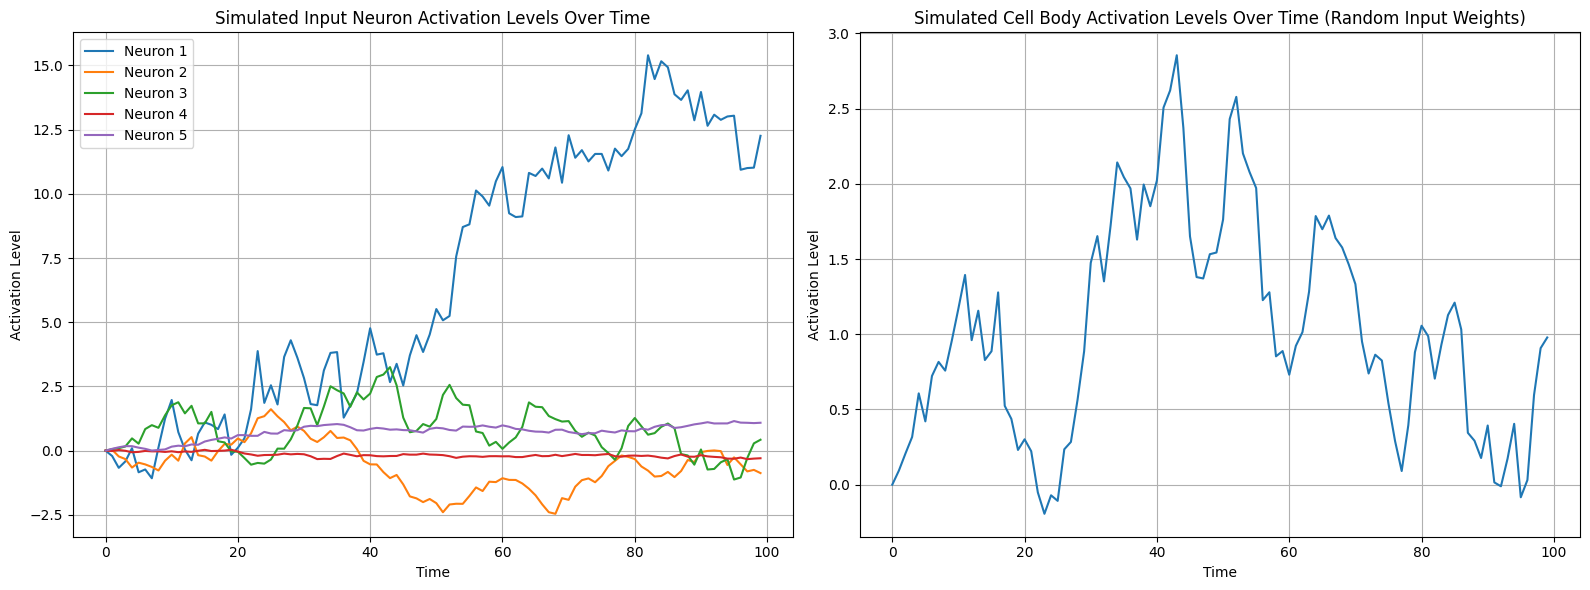

In [ ]:
# @title Plot Input next to Cell Body Activation

# Let's put the plots generated so far side-by-side
print(f"\nLet's print input activation side-by-side with cell body activation.\n")

# Create a figure with two subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot the simulated input activation levels in the left panel
for neuron in range(num_of_input_neurons):
    axes[0].plot(network_input[neuron, :], label=f'Neuron {neuron + 1}')

axes[0].set_title("Simulated Input Neuron Activation Levels Over Time")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Activation Level")
axes[0].legend()
axes[0].grid(True)

# Plot the simulated cell body activation level in the right panel
axes[1].plot(cell_body_activation)
axes[1].set_title("Simulated Cell Body Activation Levels Over Time (Random Input Weights)")
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Activation Level")
axes[1].grid(True)

# Adjust the layout to prevent overlapping labels
plt.tight_layout()

# Display the combined figure
plt.show()

# Add Threshold Function

Finally, the total network output is not the cell body activation level. Instead, it's determined by a threshold function. We'll use and compare the four defined in the next code chunk.






Defining four different threshold functions.



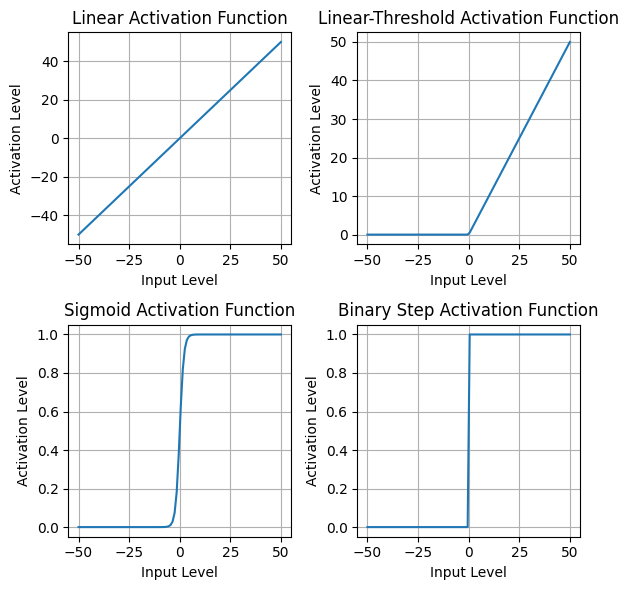

In [ ]:
# @title Define and Sample Threshold Functions

# Define each threshold function

print("\n")
print(f"Defining four different threshold functions.\n")

# Linear
def threshold_linear(cell__body__activation,scale_factor,threshold_value,activation_level):

  input = np.copy(cell__body__activation)

  # This function simply multiples the input activation level by a scale factor
  return input * scale_factor

# Linear Threshold
def threshold_linear_threshold(cell__body__activation,scale_factor,threshold_value,activation_level):

  input = np.copy(cell__body__activation)

  # First, determine when the cell body activation level is below threshold and set to zero
  mask = (input < threshold_value)
  input[mask] = 0

  # Next, subtract the threshold value from the remaining time steps
  input[~mask] -= threshold_value

  # Finally, return the thresholded activation values, multipled by the scale factor
  return input * scale_factor

# Sigmoid
def threshold_sigmoid(cell__body__activation,scale_factor,threshold_value,activation_level):

  input = np.copy(cell__body__activation)

  # This function is just the standard sigmoid, multiplied by activation level:
  return (1 / (1 + np.exp(-(input - threshold_value)))) * activation_level

# Binary Step
def threshold_binary_step(cell__body__activation,scale_factor,threshold_value,activation_level):

  input = np.copy(cell__body__activation)

  # As with the linear threshold, we use the mask
  mask = (input < threshold_value)

  # If below the threshold, set to zero
  input[mask] = 0

  # If above the threshold, set to some activation level
  input[~mask] = activation_level

  return input

scale__factor = 1.0
threshold__value = 0
activation__level = 1.0
test_vector = np.linspace(-50, 50, 100)

sample_linear = threshold_linear(test_vector,scale__factor,threshold__value,activation__level)
sample_linearthreshold = threshold_linear_threshold(test_vector,scale__factor,threshold__value,activation__level)
sample_sigmoid = threshold_sigmoid(test_vector,scale__factor,threshold__value,activation__level)
sample_binarystep = threshold_binary_step(test_vector,scale__factor,threshold__value,activation__level)

# Create a 2x2 figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(6, 6))

# Plot linear
axes[0, 0].plot(test_vector,sample_linear)
axes[0, 0].set_title("Linear Activation Function")
axes[0, 0].set_xlabel("Input Level")
axes[0, 0].set_ylabel("Activation Level")
axes[0, 0].grid(True)

# Plot linear threshold
axes[0, 1].plot(test_vector,sample_linearthreshold)
axes[0, 1].set_title("Linear-Threshold Activation Function")
axes[0, 1].set_xlabel("Input Level")
axes[0, 1].set_ylabel("Activation Level")
axes[0, 1].grid(True)

# Plot sigmoid threshold
axes[1, 0].plot(test_vector,sample_sigmoid)
axes[1, 0].set_title("Sigmoid Activation Function")
axes[1, 0].set_xlabel("Input Level")
axes[1, 0].set_ylabel("Activation Level")
axes[1, 0].grid(True)

# Plot binary step threshold
axes[1, 1].plot(test_vector,sample_binarystep)
axes[1, 1].set_title("Binary Step Activation Function")
axes[1, 1].set_xlabel("Input Level")
axes[1, 1].set_ylabel("Activation Level")
axes[1, 1].grid(True)

# Adjust layout for better spacing
plt.tight_layout()

# Display the figure with subplots
plt.show()



Computing and plotting final network output, using four different threshold functions.


Scale factor for linear thresholds: 0.85
Threshold value: 0.5196318250553952
Activation level for binary step: 1.0392636501107904




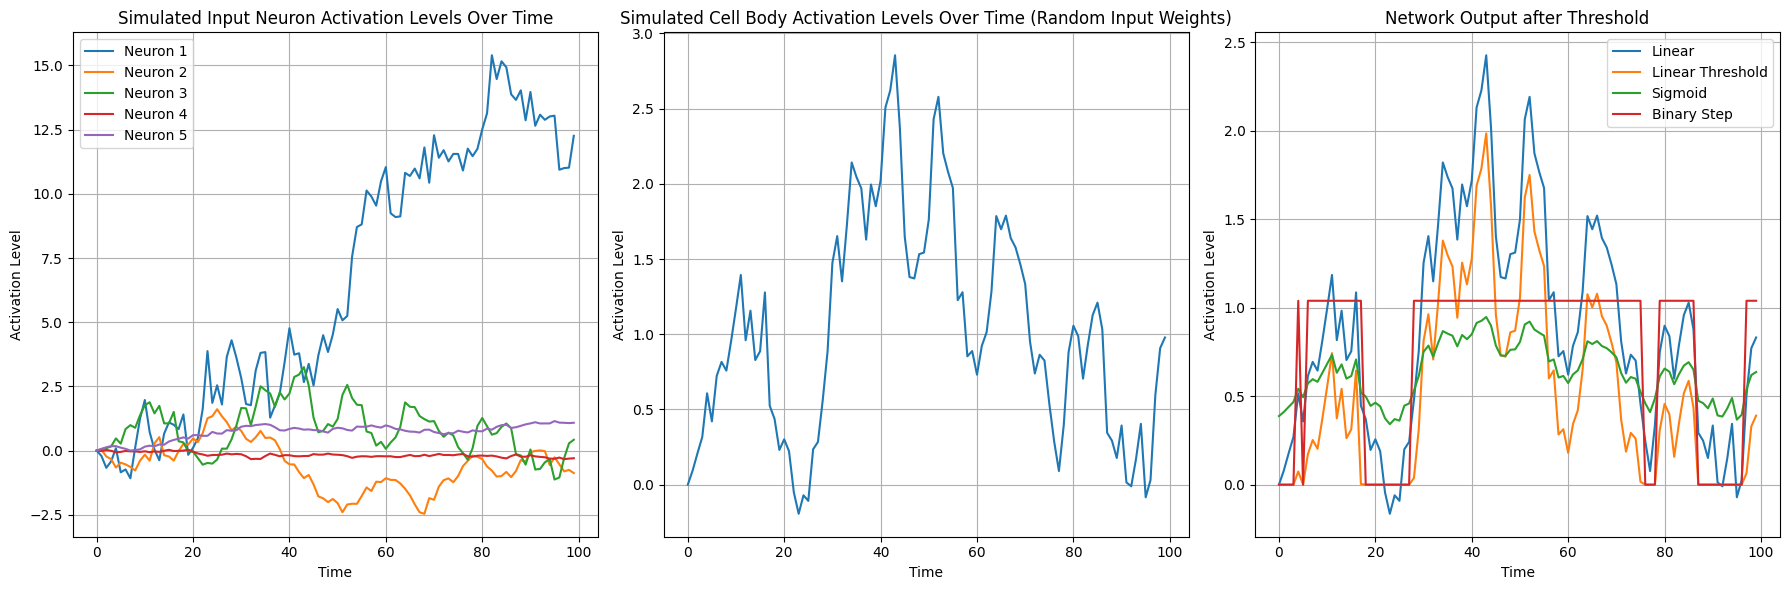

In [ ]:
# @title Compute and Plot Final Network Output

# Now, apply each to our vector holding the cell body activation levels

print("\n")
print(f"Computing and plotting final network output, using four different threshold functions.")

scale__factor = 0.85
threshold__value = 0.5 * np.mean(np.abs(cell_body_activation))
activation__level = np.mean(np.abs(cell_body_activation))

print("\n")
print(f"Scale factor for linear thresholds: {scale__factor}")
print(f"Threshold value: {threshold__value}")
print(f"Activation level for binary step: {activation__level}")
print("\n")

network_output_linear_threshold = threshold_linear(cell_body_activation,scale__factor,threshold__value,activation__level)
network_output_linearthreshold_threshold = threshold_linear_threshold(cell_body_activation,scale__factor,threshold__value,activation__level)
network_output_sigmoid_threshold = threshold_sigmoid(cell_body_activation,scale__factor,threshold__value,activation__level)
network_output_binarystep_threshold = threshold_binary_step(cell_body_activation,scale__factor,threshold__value,activation__level)

# Finally, plot the final network activations

# Create a figure with three subplots: 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot the simulated input activation levels in the left panel
for neuron in range(num_of_input_neurons):
    axes[0].plot(network_input[neuron, :], label=f'Neuron {neuron + 1}')

axes[0].set_title("Simulated Input Neuron Activation Levels Over Time")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Activation Level")
axes[0].legend()
axes[0].grid(True)

# Plot the simulated cell body activation level in the middle panel
axes[1].plot(cell_body_activation)
axes[1].set_title("Simulated Cell Body Activation Levels Over Time (Random Input Weights)")
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Activation Level")
axes[1].grid(True)

# Plot the network outputs after threshold in the right panel
axes[2].plot(network_output_linear_threshold, label="Linear")
axes[2].plot(network_output_linearthreshold_threshold, label="Linear Threshold")
axes[2].plot(network_output_sigmoid_threshold, label="Sigmoid")
axes[2].plot(network_output_binarystep_threshold, label="Binary Step")

axes[2].set_title("Network Output after Threshold")
axes[2].set_xlabel("Time")
axes[2].set_ylabel("Activation Level")
axes[2].legend()
axes[2].grid(True)

# Adjust the layout to prevent overlapping labels
plt.tight_layout()

# Display the combined figure
plt.show()

# Training Network to Compute AND

Let's now use this network to compute AND. We'll need to reset the number of inputs to 2. (We could leave them at some larger number, making the network a generalized AND gate.) The end goal is for it to produce a 1 if and only if both inputs are 1. We'll try all four threshold activation functions, but, perhaps unsurprisingly, only the binary step function gives good results.

For this we will need to train the network. We'll use the Perceptron Convergence Rule.

<div>
<img src="https://drive.google.com/uc?export=view&id=1pgXHsOS7_PbTQigunpfukw2wOf2M-HxK" alt="Schematic Figure of Neuron" width="500"/>
</div>

The results will be different each time the code chunk is run, since each time it's run it randomly picks a different learning rate and randomly sets new initial input unit weights.

Warning: Running the below blocks of code will change the network inputs, and so mess up the above blocks of code, if they're run again!



Using perceptron convergence rule to train network into a binary AND gate.


Reset the number of input neurons to 2.
Reset the network_input array with random 1s (TRUE) and 0s (FALSE).
Reset the network weights.
Reset the activation level to the Boolean 1 (TRUE), and reset scale factor to 1 for linear activation.
Initializing with a random learning rate of: 0.11620144113303543.
Number of times to loop through input time series: 1.


Computing initial untrained output and accuracy, with threshold/activation function: Linear
Initial Network Accuracy: 22.0
Applying the perceptron convergence rule to input training data.
Initial threshold value: 0.5196318250553952
Initial input weights: [-0.68411009 -0.65648807]
Learning Complete!
Final threshold value: 0.3643968383561425
Final input weights: [0.26230073 0.30243545]
Final Network Accuracy: 22.0



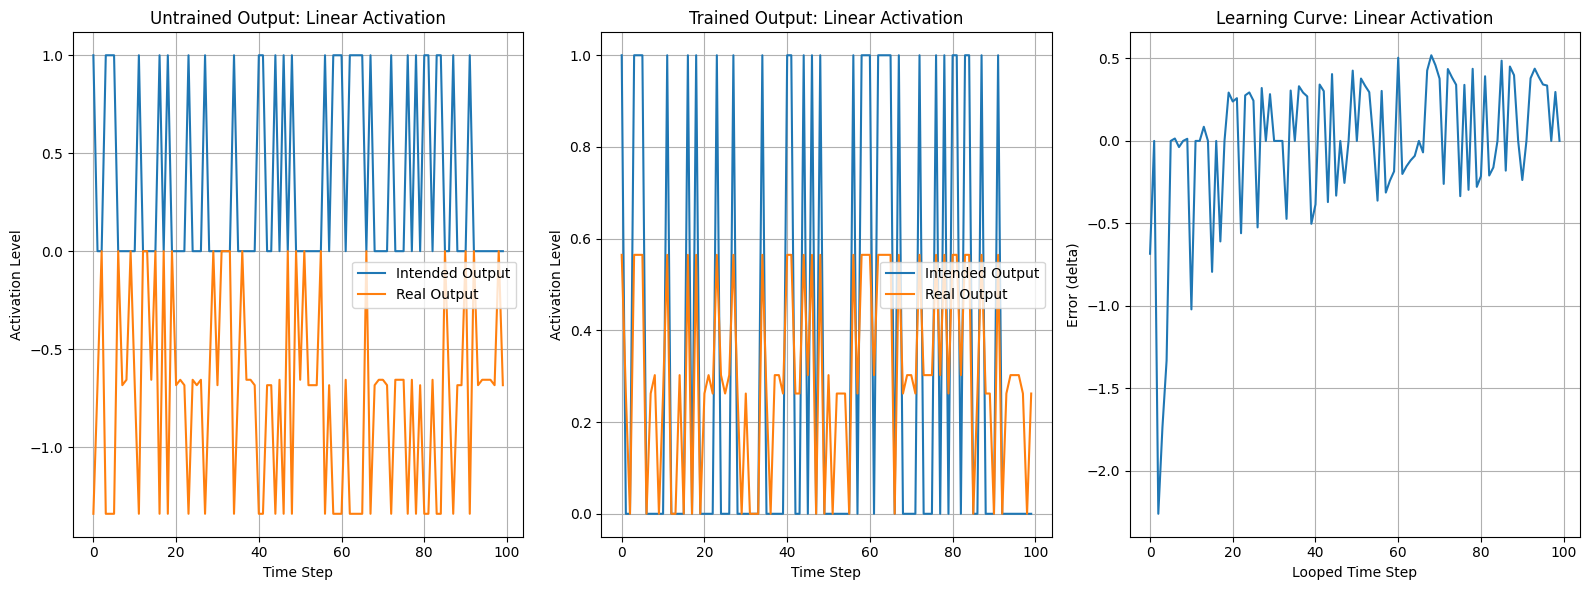



Computing initial untrained output and accuracy, with threshold/activation function: Linear Threshold
Initial Network Accuracy: 67.0
Applying the perceptron convergence rule to input training data.
Initial threshold value: 0.5196318250553952
Initial input weights: [-0.68411009 -0.65648807]
Learning Complete!
Final threshold value: 0.3021682963324296
Final input weights: [0.38352942 0.42279839]
Final Network Accuracy: 22.0



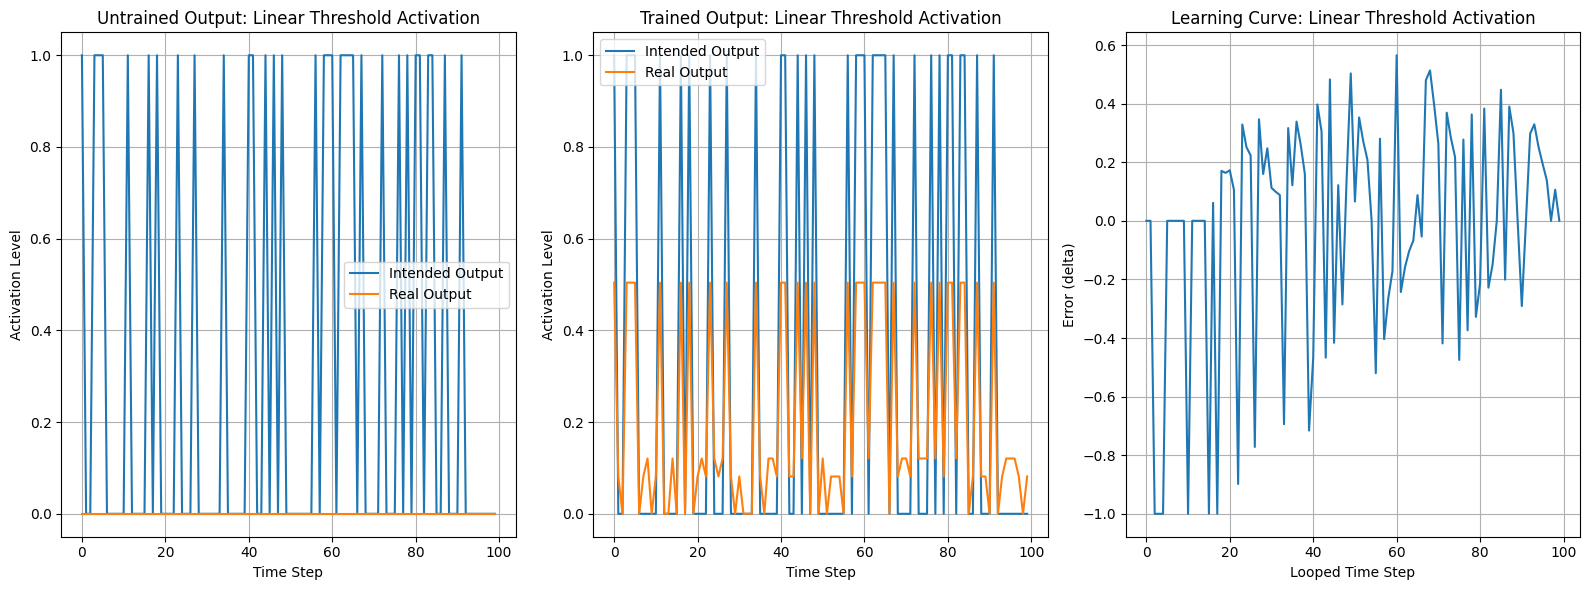



Computing initial untrained output and accuracy, with threshold/activation function: Sigmoid
Initial Network Accuracy: 0.0
Applying the perceptron convergence rule to input training data.
Initial threshold value: 0.5196318250553952
Initial input weights: [-0.68411009 -0.65648807]
Learning Complete!
Final threshold value: 1.1895843383121254
Final input weights: [0.47699641 0.59992482]
Final Network Accuracy: 0.0



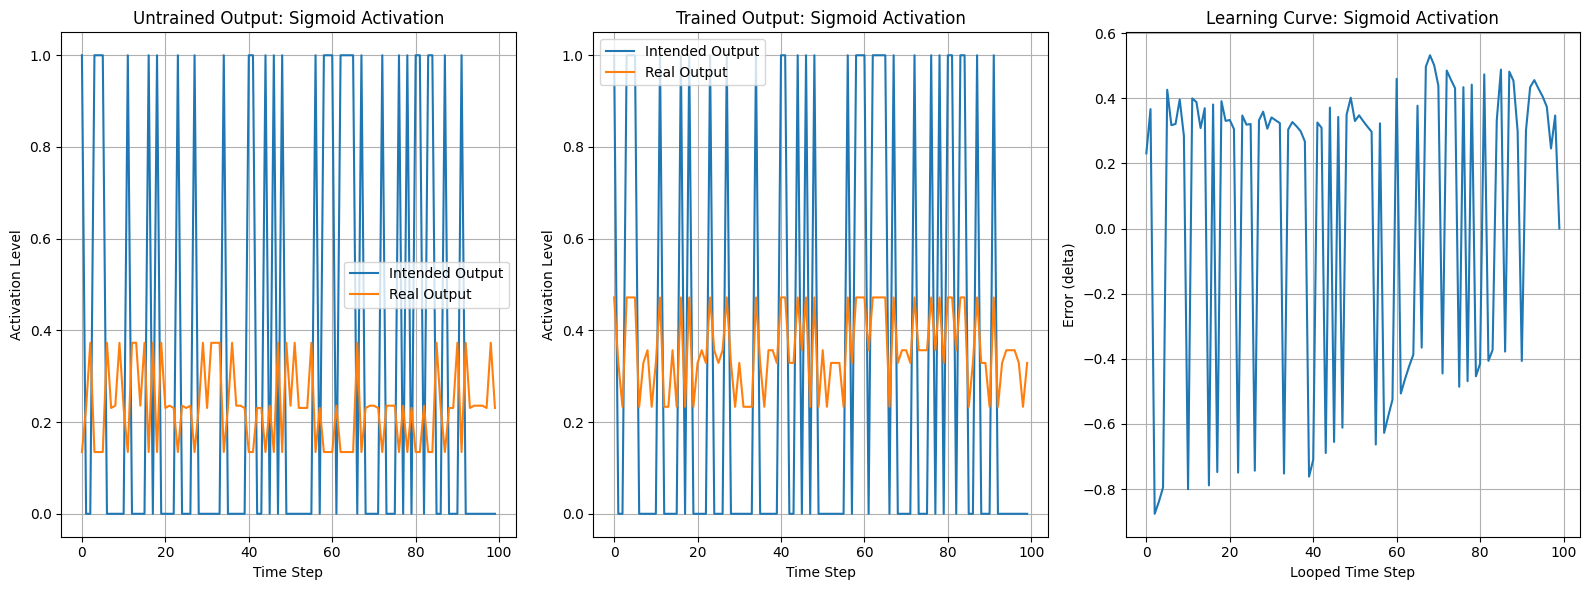



Computing initial untrained output and accuracy, with threshold/activation function: Binary_step
Initial Network Accuracy: 67.0
Applying the perceptron convergence rule to input training data.
Initial threshold value: 0.5196318250553952
Initial input weights: [-0.68411009 -0.65648807]
Learning Complete!
Final threshold value: 0.2872289427893243
Final input weights: [0.24550144 0.15692202]
Final Network Accuracy: 100.0



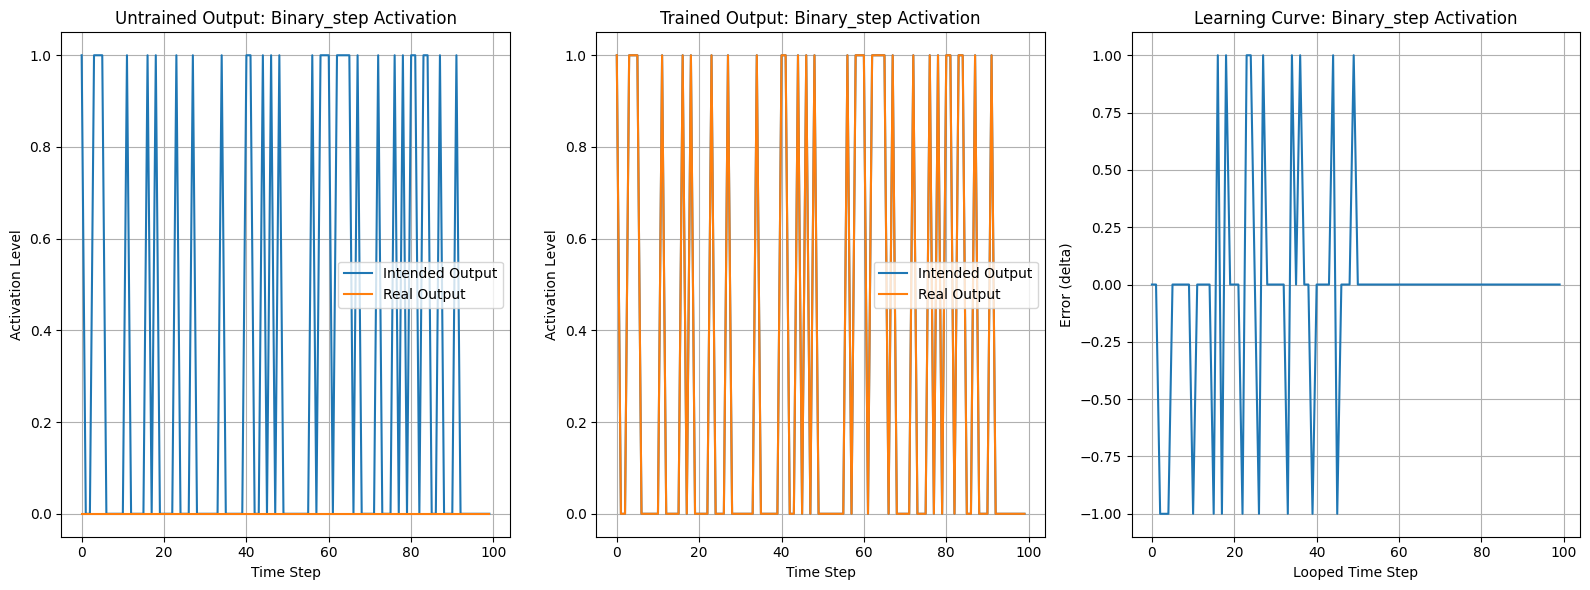

In [ ]:
# @title Define and Apply Perceptron Convergence Rule

print("\n")
print(f"Using perceptron convergence rule to train network into a binary AND gate.")

# Reset number of input neurons to 2
print("\n")
print(f"Reset the number of input neurons to 2.")
num_of_input_neurons = 2

# Reset network_input array
print(f"Reset the network_input array with random 1s (TRUE) and 0s (FALSE).")
probability_of_one = 0.5
network_input = np.random.choice([0, 1], size=(num_of_input_neurons, time_steps), p=[1 - probability_of_one, probability_of_one])

# Reset network weights to something random (between -1 and 1)
print(f"Reset the network weights.")
network_weights = np.random.uniform(-1, 1, size=num_of_input_neurons)

# Reset activation level
print(f"Reset the activation level to the Boolean 1 (TRUE), and reset scale factor to 1 for linear activation.")
activation__level = 1
scale__factor = 1.0

# Initiate a random learning rate
learning_rate = np.random.uniform(0, 1)
print(f"Initializing with a random learning rate of: {learning_rate}.")
num_of_loops = 1
print(f"Number of times to loop through input time series: {num_of_loops}.")

# Define the intended function to learn
def AND(input):

  '''
  The function will need to handle two cases as input:
   1. A single column of network input (network input at one time step),
   2. The entire series of time steps of network inputs (all columns).

   In the second case, we want the function to return a vector with the intended output at each time step.
   In the first case, we want the function to return a single value, the intended output at that time step.
  '''

  if input.ndim == 2:
    if input.shape[1] > 1:
      return np.min(input, axis=0) # "min" is equivalent to AND
    else:
      raise ValueError("Error! Unrecognized input for AND function. Returning zero.")
  else:
    return np.min(input)

# Define a function that will do perceptron convergence learning
def perceptron_convergence_learning(threshold__function,function_name,function_to_learn,activation_adjustment=False):

  # Don't actually want this function to change the weights or threshold
  threshold__value_copy = np.copy(threshold__value)
  network_weights_copy = np.copy(network_weights)
  activation__level_copy = np.copy(activation__level)

  print("\n")
  print("Computing initial untrained output and accuracy, with threshold/activation function:", function_name)

  # Compute untrained output and initial accuracy
  real_output_initial = threshold__function(compute_cell_body_activation(network_weights_copy, network_input),scale__factor,threshold__value_copy,activation__level_copy)
  intended_output_initial = function_to_learn(network_input)
  matching_elements_initial = (real_output_initial == intended_output_initial)
  percentage_matching_initial = (np.sum(matching_elements_initial) / len(real_output_initial)) * 100
  print(f"Initial Network Accuracy: {percentage_matching_initial}")

  print("Applying the perceptron convergence rule to input training data.")
  print(f"Initial threshold value: {threshold__value_copy}")
  print(f"Initial input weights: {network_weights_copy}")

  saved_delta = np.zeros(time_steps * num_of_loops) # For saving and plotting learning
  counter = 0

  for i in range(num_of_loops):
    for time_step in np.arange(time_steps)[1:]:

      # Compute the real and intended outputs
      real_output = threshold__function(compute_cell_body_activation(network_weights_copy, network_input[:,time_step]),scale__factor,threshold__value_copy,activation__level_copy)
      intended_output = function_to_learn(network_input[:,time_step])

      # Compute the error, i.e. divergence between real and intended output
      delta = real_output - intended_output

      # Save, so we can plot learning over the time steps
      saved_delta[counter] = delta
      counter += 1

      # Adjust the threshold value, according to the perceptron convergence rule
      threshold__value_copy = threshold__value_copy - (-learning_rate * delta)

      # Adjust the activation value, analogous to the threshold value adjustment
      if activation_adjustment:
        activation__level_copy = activation__level_copy - (-learning_rate * delta)

      # Adjust all the weights, according to the perceptron convergence rule
      for neuron in np.arange(num_of_input_neurons):
        network_weights_copy[neuron] = network_weights_copy[neuron] - (learning_rate * delta * network_input[neuron,time_step])

  print("Learning Complete!")
  print(f"Final threshold value: {threshold__value_copy}")
  print(f"Final input weights: {network_weights_copy}")

  # Compute final accuracy
  real_output = threshold__function(compute_cell_body_activation(network_weights_copy, network_input),scale__factor,threshold__value_copy,activation__level_copy)
  intended_output = function_to_learn(network_input)
  matching_elements = (real_output == intended_output)
  percentage_matching = (np.sum(matching_elements) / len(real_output)) * 100
  print(f"Final Network Accuracy: {percentage_matching}\n")

  # Create a figure with two subplots: 1 row, 3 columns
  fig, axes = plt.subplots(1, 3, figsize=(16, 6))

  # Plot real vs intended output, initial
  axes[0].plot(intended_output_initial, label=f'Intended Output')
  axes[0].plot(real_output_initial, label=f'Real Output')

  axes[0].set_title(f"Untrained Output: {function_name} Activation")
  axes[0].set_xlabel("Time Step")
  axes[0].set_ylabel("Activation Level")
  axes[0].legend()
  axes[0].grid(True)

  # Plot real vs intended output, final
  axes[1].plot(intended_output, label=f'Intended Output')
  axes[1].plot(real_output, label=f'Real Output')

  axes[1].set_title(f"Trained Output: {function_name} Activation")
  axes[1].set_xlabel("Time Step")
  axes[1].set_ylabel("Activation Level")
  axes[1].legend()
  axes[1].grid(True)

  # Plot the simulated cell body activation level in the right panel
  axes[2].plot(saved_delta)
  axes[2].set_title(f"Learning Curve: {function_name} Activation")
  axes[2].set_xlabel("Looped Time Step")
  axes[2].set_ylabel("Error (delta)")
  axes[2].grid(True)

  # Adjust the layout to prevent overlapping labels
  plt.tight_layout()

  # Display the combined figure
  plt.show()

# Now run the learning function for each activation function
perceptron_convergence_learning(threshold__function = threshold_linear,
                                function_name = "Linear",
                                function_to_learn = AND)
perceptron_convergence_learning(threshold__function = threshold_linear_threshold,
                                function_name = "Linear Threshold",
                                function_to_learn = AND)
perceptron_convergence_learning(threshold__function = threshold_sigmoid,
                                function_name = "Sigmoid",
                                function_to_learn = AND)
perceptron_convergence_learning(threshold__function = threshold_binary_step,
                                function_name = "Binary_step",
                                function_to_learn = AND)


## Discussion Questions

1. Why is the binary step function the only activation function to ever achieve 100% accuracy?
2. Does the training have an effect on the network for the other three activation functions? If so, why are they failing to reach 100% accuracy?
3. If you run the code chunk enough times, you'll notice a pattern: the linear network makes a little progress, the linear threshold and sigmoid networks make more progress, and the binary step function lands on perfect performance quickly. (Each time the code is run, it starts with different random initial values, so the results will differ run-to-run.)
4. Does the learning rate matter? (It will change each time you run the code chunk.)

Let's try a much lower learning rate and many more training loops and see if that improves things for the three networks (linear, linear threshold, and sigmoid) which didn't do well.


Rerunning the AND learning with a much lower learning rate and many more training loops (no activation level changes).

Initializing with a low learning rate of: 0.001.
Number of times to loop through input time series: 2000.


Computing initial untrained output and accuracy, with threshold/activation function: Linear
Initial Network Accuracy: 22.0
Applying the perceptron convergence rule to input training data.
Initial threshold value: 0.5196318250553952
Initial input weights: [-0.68411009 -0.65648807]
Learning Complete!
Final threshold value: 15.717948702220047
Final input weights: [0.32995358 0.41195341]
Final Network Accuracy: 22.0



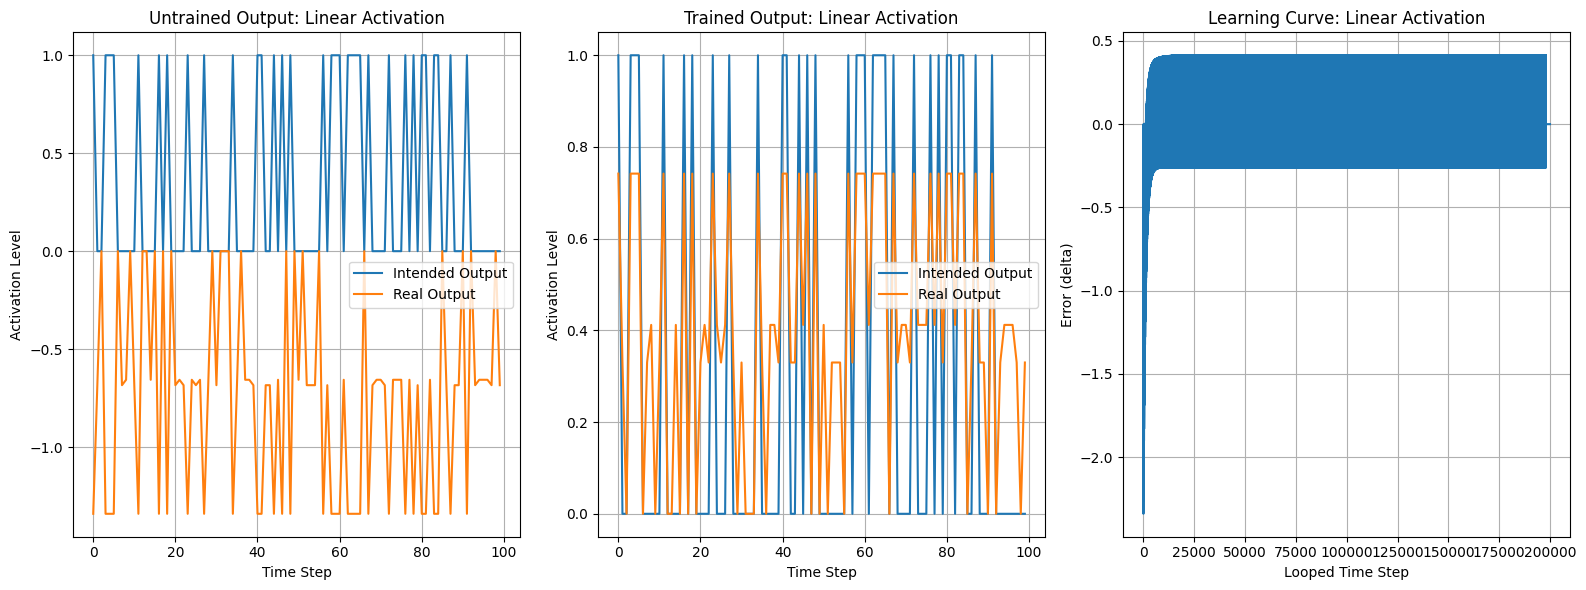



Computing initial untrained output and accuracy, with threshold/activation function: Linear Threshold
Initial Network Accuracy: 67.0
Applying the perceptron convergence rule to input training data.
Initial threshold value: 0.5196318250553952
Initial input weights: [-0.68411009 -0.65648807]
Learning Complete!
Final threshold value: 0.9998290445152765
Final input weights: [0.99987863 0.9998945 ]
Final Network Accuracy: 22.0



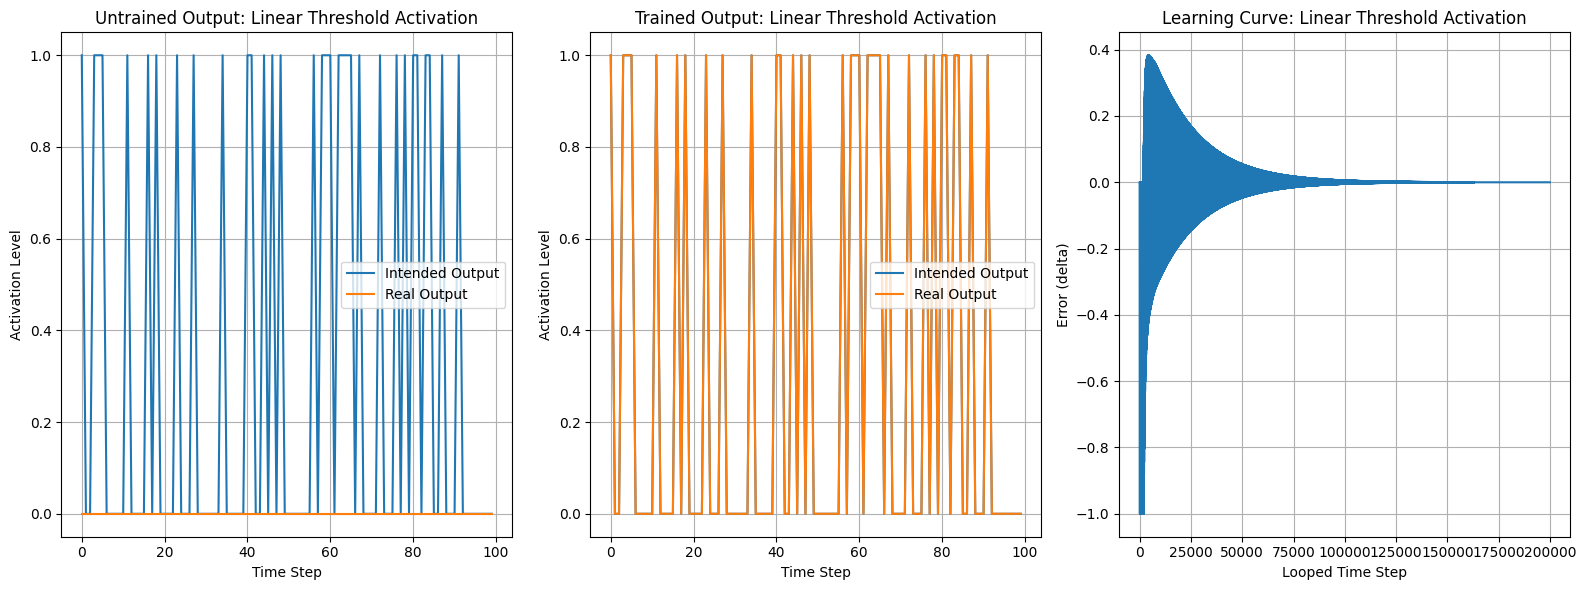



Computing initial untrained output and accuracy, with threshold/activation function: Sigmoid
Initial Network Accuracy: 0.0
Applying the perceptron convergence rule to input training data.
Initial threshold value: 0.5196318250553952
Initial input weights: [-0.68411009 -0.65648807]
Learning Complete!
Final threshold value: 6.520480042912928
Final input weights: [4.22567676 4.48176927]
Final Network Accuracy: 0.0



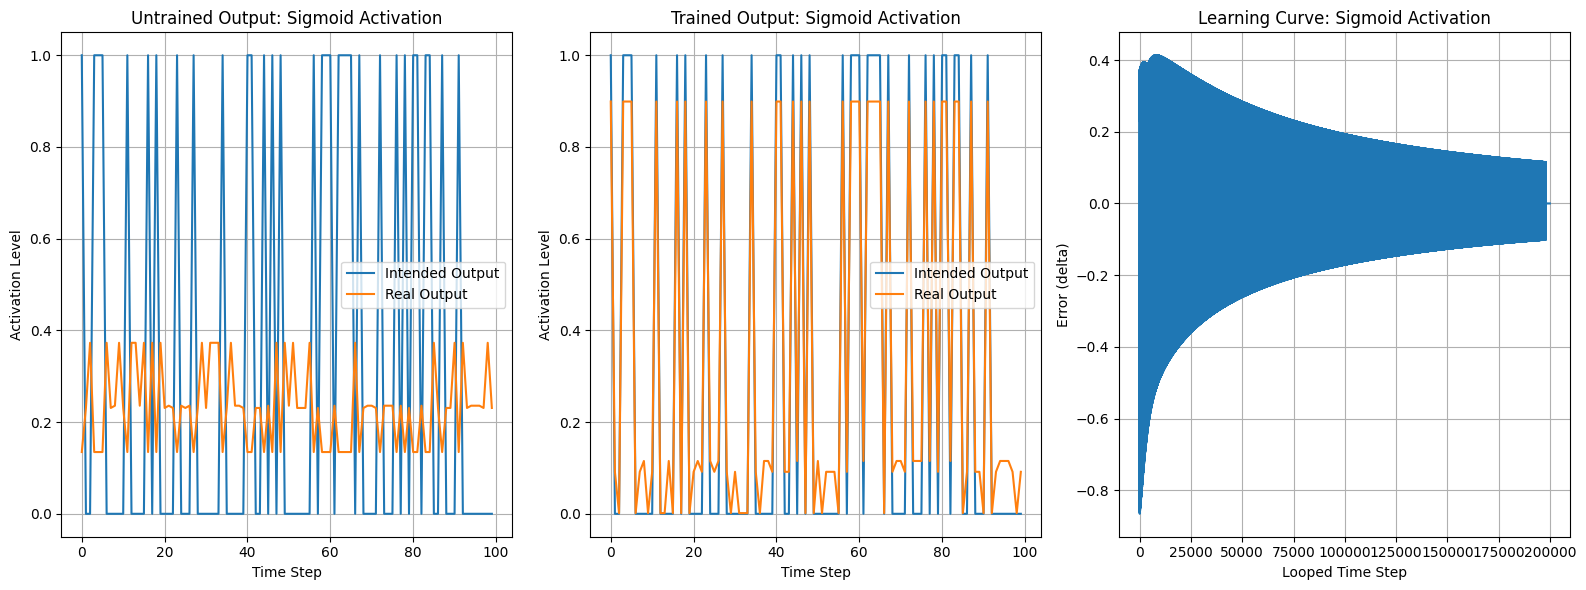



Computing initial untrained output and accuracy, with threshold/activation function: Binary_step
Initial Network Accuracy: 67.0
Applying the perceptron convergence rule to input training data.
Initial threshold value: 0.5196318250553952
Initial input weights: [-0.68411009 -0.65648807]
Learning Complete!
Final threshold value: 0.0016318250553947252
Final input weights: [0.00088991 0.00151193]
Final Network Accuracy: 100.0



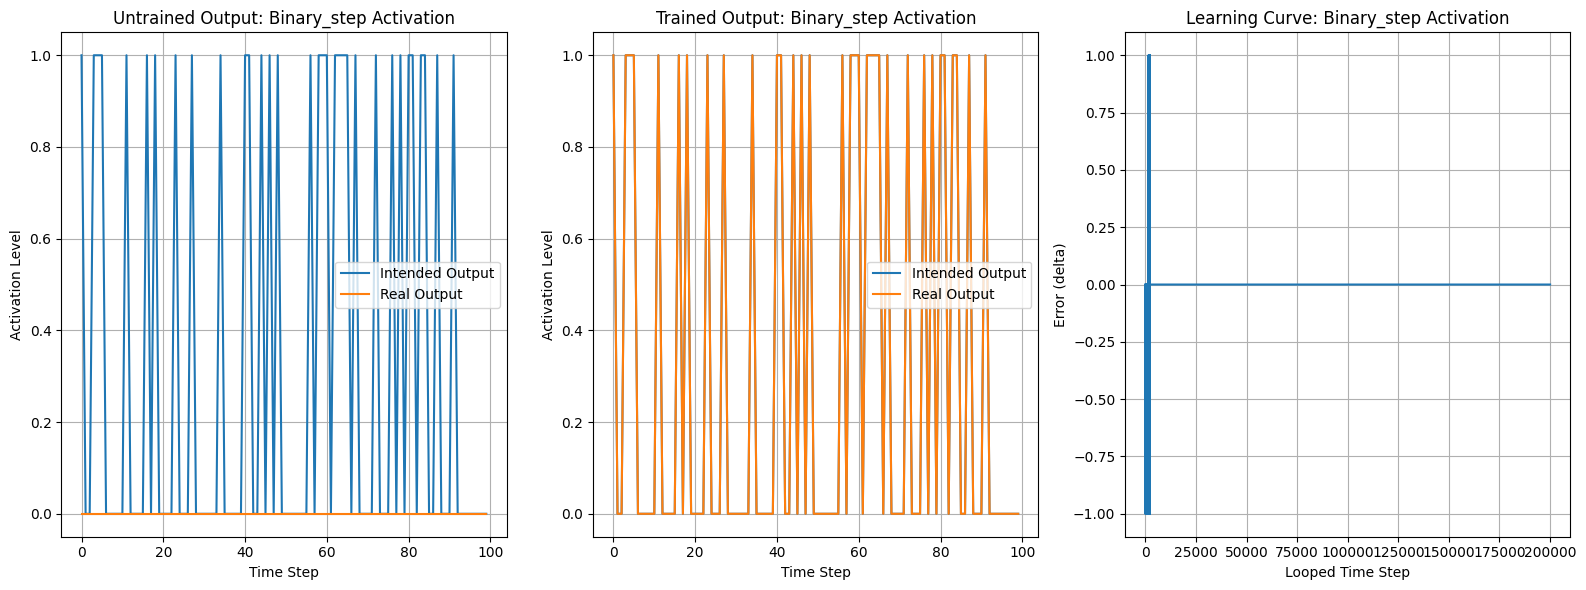

In [ ]:
# @title Rerun AND Learning w/ Low Learning Rate and More Training Loops

print("\nRerunning the AND learning with a much lower learning rate and many more training loops (no activation level changes).\n")

# Initiate a very low learning rate and set a large number of training loops
learning_rate = 0.001
print(f"Initializing with a low learning rate of: {learning_rate}.")
num_of_loops = 2000
print(f"Number of times to loop through input time series: {num_of_loops}.")

perceptron_convergence_learning(threshold_linear,"Linear",AND)
perceptron_convergence_learning(threshold_linear_threshold,"Linear Threshold",AND)
perceptron_convergence_learning(threshold_sigmoid,"Sigmoid",AND)
perceptron_convergence_learning(threshold_binary_step,"Binary_step",AND)

## Comments

Look at the real vs intended outputs, but also focus on the learning curves (far right plots):

1. Notice that the linear network makes some progress, but quickly hits a wall without error improving much.
2. On the other hand, we see that with a lower learning rate and many many training loops, the linear threshold function eliminates almost all of its error, and pretty fast, too! (Why is the accuracy still so poor? Is there a better measure of accuracy which reflects its learning?)
3. We find a similar pattern with the sigmoid, although (surpringly) it may not actually do quite as well as the linear threshold, and may seem to require even more training. The learning curve should suggest that it will continue improving with more training.
4. Of course, the binary step network quickly hits perfect performance and sits there.

# Training Network to Learn New Weights (Weighted Sum)

Let's try something very different. We'll initialize the network again with random weights on its input, then generate a new set of random weights. Instead of putting the new weights right into the network, we'll use the perceptron converence rule to search for, and discover, the new intended weights. This is equivalent to training the network to compute a near linear function of inputs.



Using perceptron convergence rule to train network to compute a new linear function (weighted sum).


We can use any number of inputs, but let's reset the number of input neurons to 7.
Reset the network_input array with values from random walks.
Reset the network weights:
 [ 0.55418837 -0.54784663  0.44335481 -0.64472597  0.68927251 -0.06549481
 -0.49762924].
Selecting random weights to learn:
 [ 0.70289181 -0.50856401  0.71837988 -0.89847502 -0.86283015  0.49980815
  0.39730171].
Note that we're leaving the activation level and scale factor at 1, but these could be set to something else.
Initializing with a low learning rate of: 0.001.
Number of times to loop through input time series: 10.
Defining the function to learn, which is just the dot product of the new weights and input activation levels


Computing initial untrained output and accuracy, with threshold/activation function: Linear
Initial Network Accuracy: 1.0
Applying the perceptron convergence rule to input training data.


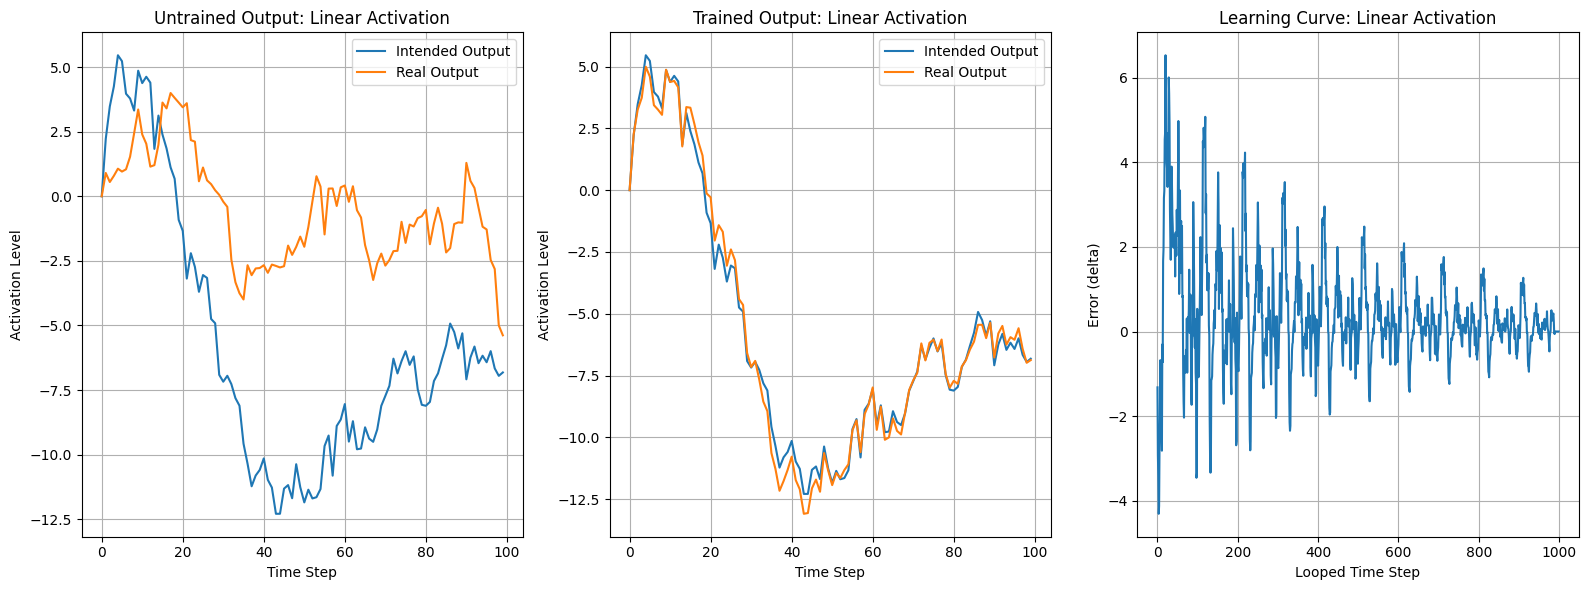



Computing initial untrained output and accuracy, with threshold/activation function: Linear Threshold
Initial Network Accuracy: 1.0
Applying the perceptron convergence rule to input training data.
Initial threshold value: 0.5196318250553952
Initial input weights: [ 0.55418837 -0.54784663  0.44335481 -0.64472597  0.68927251 -0.06549481
 -0.49762924]
Learning Complete!
Final threshold value: 12.493719870548338
Final input weights: [  1.82043263 -13.22351677  25.19554311   7.39558011 -12.49324057
  -0.41988944  13.82309011]
Final Network Accuracy: 1.0



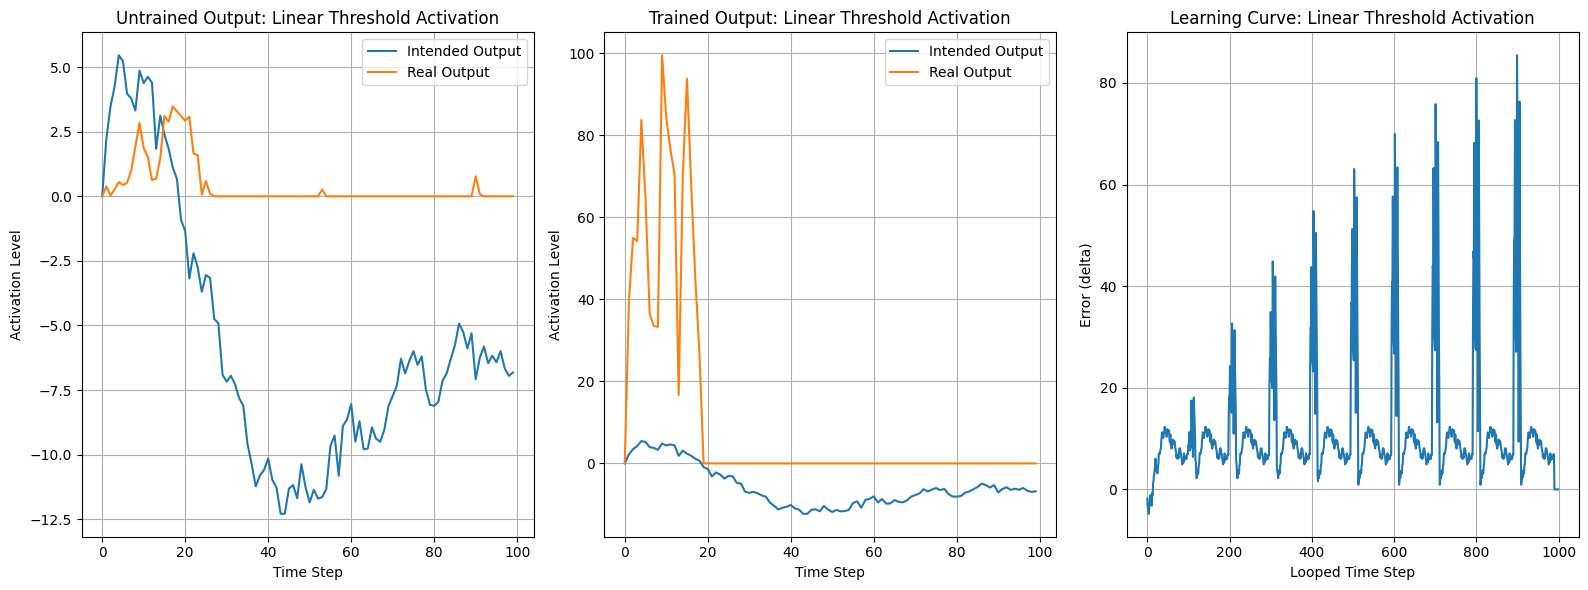



Computing initial untrained output and accuracy, with threshold/activation function: Sigmoid
Initial Network Accuracy: 0.0
Applying the perceptron convergence rule to input training data.
Initial threshold value: 0.5196318250553952
Initial input weights: [ 0.55418837 -0.54784663  0.44335481 -0.64472597  0.68927251 -0.06549481
 -0.49762924]
Learning Complete!
Final threshold value: 6.433914922932069
Final input weights: [  1.67483034 -13.27994984  46.82007312   3.07968611 -14.56524819
   5.1660039    9.67919089]
Final Network Accuracy: 0.0



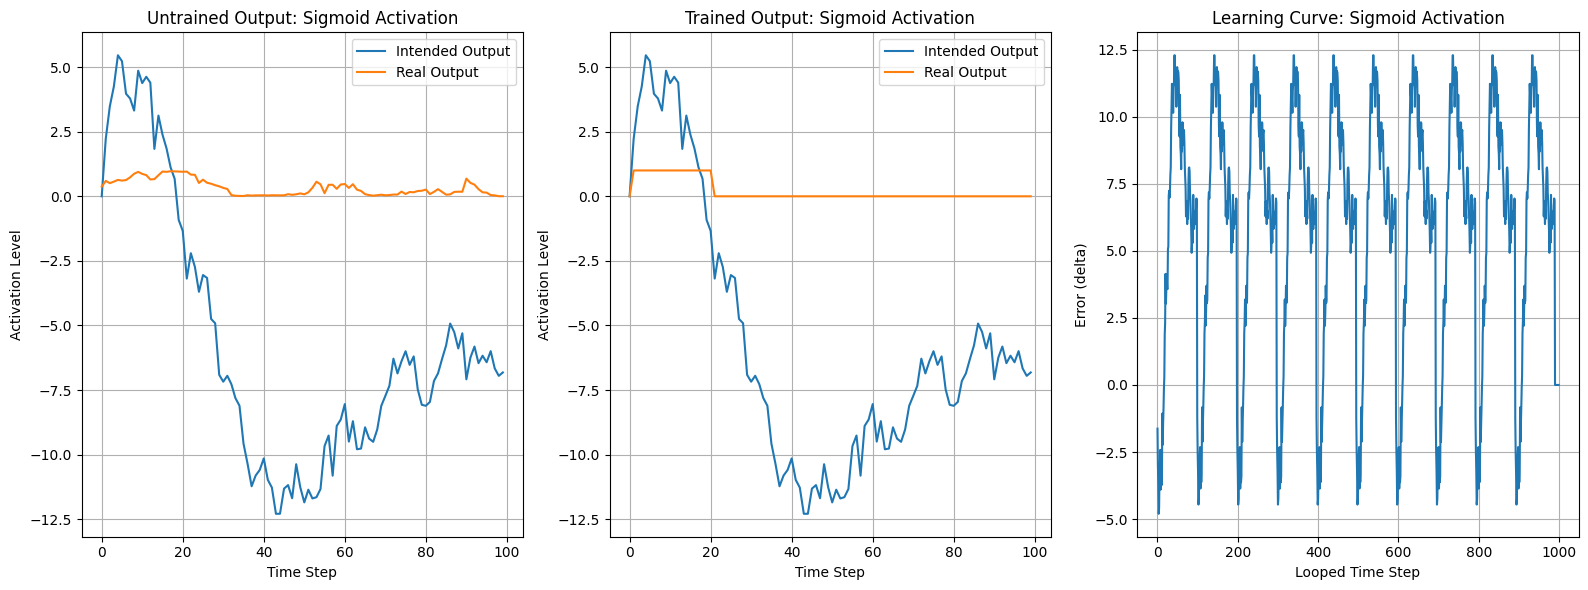



Computing initial untrained output and accuracy, with threshold/activation function: Binary Step
Initial Network Accuracy: 1.0
Applying the perceptron convergence rule to input training data.
Initial threshold value: 0.5196318250553952
Initial input weights: [ 0.55418837 -0.54784663  0.44335481 -0.64472597  0.68927251 -0.06549481
 -0.49762924]
Learning Complete!
Final threshold value: 6.43656835583083
Final input weights: [  1.67486374 -13.27909999  46.80585911   3.08172135 -14.56096792
   5.16105719   9.67886684]
Final Network Accuracy: 1.0



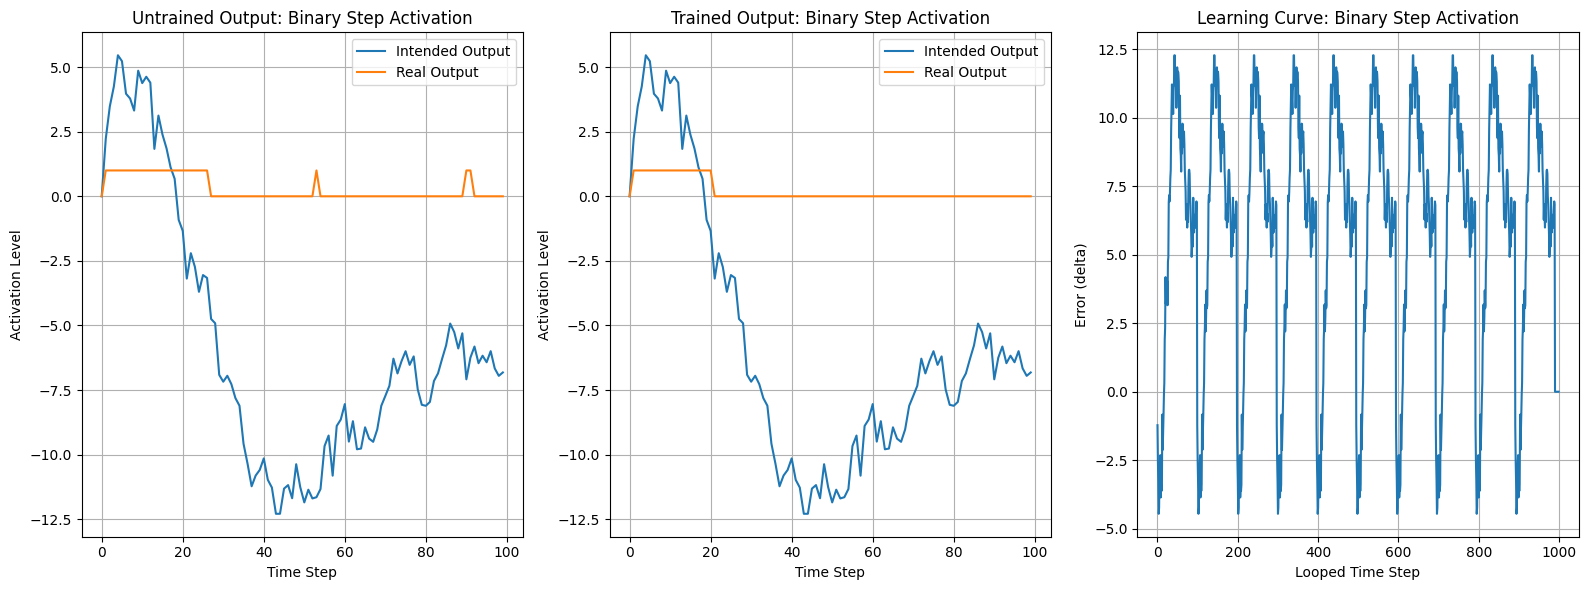

In [ ]:
# @title Apply Perceptron Convergence Rule

print("\n")
print(f"Using perceptron convergence rule to train network to compute a new linear function (weighted sum).")

# Reset number of input neurons to 7
print("\n")
print(f"We can use any number of inputs, but let's reset the number of input neurons to 7.")
num_of_input_neurons = 7

# Reset network_input array with random walks
print(f"Reset the network_input array with values from random walks.")
activation_variation = np.abs(np.random.normal(mean_input,input_variation,size=num_of_input_neurons))
network_input = np.zeros((num_of_input_neurons, time_steps))
for neuron in np.arange(num_of_input_neurons):
  for time_step in np.arange(time_steps)[1:]:
    network_input[neuron,time_step] = network_input[neuron,time_step-1] + np.random.normal(0,activation_variation[neuron])

# Reset network weights to something random (between -1 and 1)
network_weights = np.random.uniform(-1, 1, size=num_of_input_neurons)
print(f"Reset the network weights:\n {network_weights}.")

# Pick random weights to learn (between -1 and 1)
network_weights_to_learn = np.random.uniform(-1, 1, size=num_of_input_neurons)
print(f"Selecting random weights to learn:\n {network_weights_to_learn}.")

# Reset activation level
print(f"Note that we're leaving the activation level and scale factor at 1, but these could be set to something else.")
activation__level = 1
scale__factor = 1.0

# Initiate a very low learning rate and set a large number of training loops
learning_rate = 0.001
print(f"Initializing with a low learning rate of: {learning_rate}.")
num_of_loops = 10
print(f"Number of times to loop through input time series: {num_of_loops}.")

# Define the intended function to learn
print(f"Defining the function to learn, which is just the dot product of the new weights and input activation levels")
def weighted_sum(input,weights=network_weights_to_learn):

  '''
  The function will need to handle two cases as input:
   1. A single column of network input (network input at one time step),
   2. The entire series of time steps of network inputs (all columns).

   In the second case, we want the function to return a vector with the intended output at each time step.
   In the first case, we want the function to return a single value, the intended output at that time step.
  '''

  if weights.shape[0] != input.shape[0]:
        raise ValueError("Number of weights must match the number of input neurons")

  if input.ndim == 2:
    if input.shape[1] > 1:
      output = np.zeros(input.shape[1])
      for time_step in range(input.shape[1]):
        output[time_step] = np.dot(weights, input[:,time_step])
      return output
    else:
      raise ValueError("Error! Unrecognized input for AND function. Returning zero.")
  else:
    return np.dot(weights, input)

# Now run the learning function for each activation function
perceptron_convergence_learning(threshold_linear,"Linear",weighted_sum)
perceptron_convergence_learning(threshold_linear_threshold,"Linear Threshold",weighted_sum)
perceptron_convergence_learning(threshold_sigmoid,"Sigmoid",weighted_sum)
perceptron_convergence_learning(threshold_binary_step,"Binary Step",weighted_sum)


## Discussion Questions

1. This time it was the linear network which did well, and the others which did poorly. Why?
2. We deliberately picked a very low learning rate to start and let it loop a lot more through the training data. What happens if we set the learning rate higher? Does the network do as well?

Let's end by letting the linear network train through more loops, to see how close we can come to recovering the new weights.


Rerunning the New Weight learning with a bunch more training loops.

Initializing with a low learning rate of: 0.001.
Number of times to loop through input time series: 100.


Computing initial untrained output and accuracy, with threshold/activation function: Linear
Initial Network Accuracy: 1.0
Applying the perceptron convergence rule to input training data.
Initial threshold value: 0.5196318250553952
Initial input weights: [ 0.55418837 -0.54784663  0.44335481 -0.64472597  0.68927251 -0.06549481
 -0.49762924]
Learning Complete!
Final threshold value: 0.8760296310117012
Final input weights: [ 0.74356929 -0.50895632  0.7175889  -0.8644905  -0.86290856  0.50511304
  0.38248416]
Final Network Accuracy: 1.0



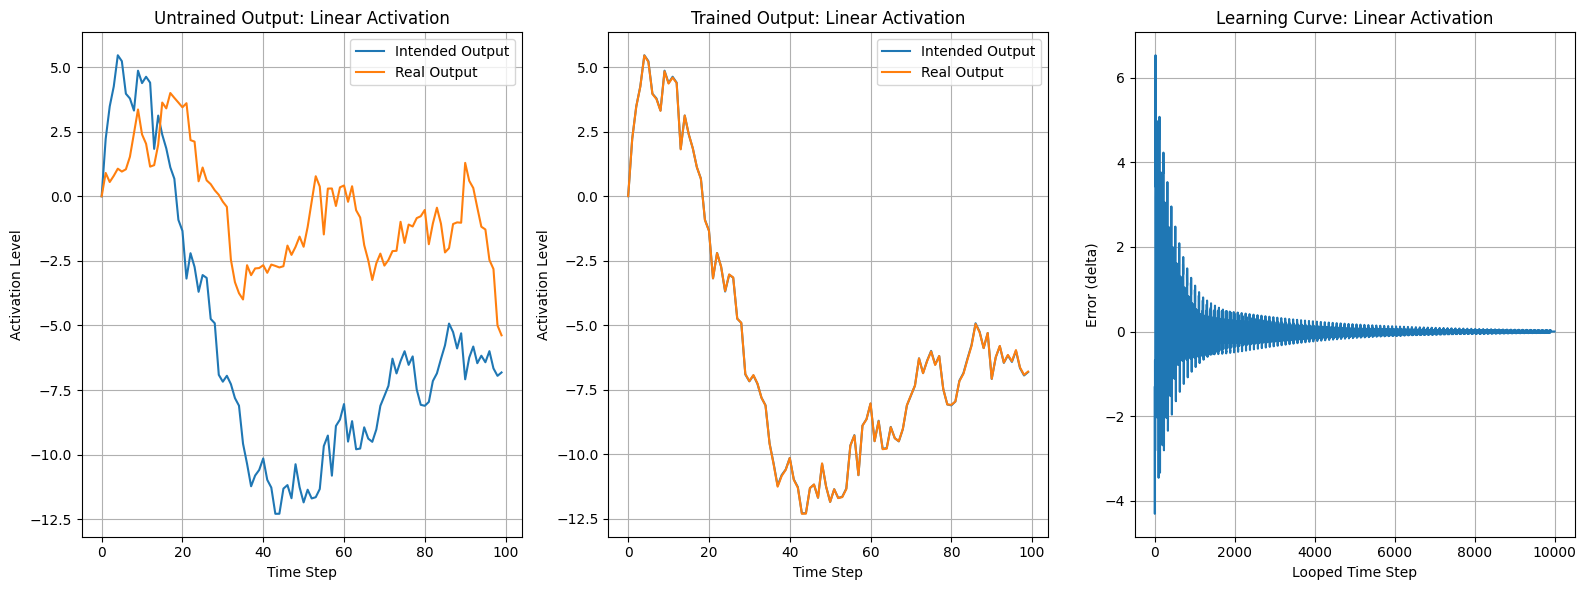

In [ ]:
# @title Rerun New Weight Learning w/ More Training

print("\nRerunning the New Weight learning with a bunch more training loops.\n")

# Initiate a very low learning rate and set a large number of training loops
learning_rate = 0.001
print(f"Initializing with a low learning rate of: {learning_rate}.")
num_of_loops = 100
print(f"Number of times to loop through input time series: {num_of_loops}.")

perceptron_convergence_learning(threshold_linear,"Linear",weighted_sum)

## Discussion Questions

1. That looks really close and we get a really nicely shaped learning curve showing a steady reduction in error. Why is the overall accuracy still so low?
2. Is there a better measure of accuracy for the network which would reflect how well it's learned the new weights?

# Final Thoughts: Why Different Activation Functions?

Hopefully the above two examples show why it's important to have different activation functions (e.g., linear vs linear threshold vs sigmoid vs binary step). Even using the same learning algorithm (the perceptron convergence rule), different activation functions are better or worse for training a network on a given type of problem.

Question: Which kind of activation funciton would we want to use for training a network to distinguish between two kinds of inputs, e.g. between sonar echos from mines vs sonar echos from rocks?